#Rats Exploration ANOVA

#Importing Libraries and Loading Dataset

In [10]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
df = pd.read_csv('RatEx.csv')

#Checking for Assumptions

##Normality

In [13]:
shapiro_shape = shapiro(df[df['Stimuli'] == 'Shape']['Time'])
shapiro_pattern = shapiro(df[df['Stimuli'] == 'Pattern']['Time'])
shapiro_picture = shapiro(df[df['Stimuli'] == 'Picture']['Time'])
print(shapiro_shape)
print(shapiro_pattern)
print(shapiro_picture)

ShapiroResult(statistic=0.943737804889679, pvalue=0.5479545593261719)
ShapiroResult(statistic=0.9500510692596436, pvalue=0.6377314925193787)
ShapiroResult(statistic=0.9151579737663269, pvalue=0.24829529225826263)


##Homogeneity

In [6]:
levene_test = levene(df[df['Stimuli'] == 'Shape']['Time'],
                     df[df['Stimuli'] == 'Pattern']['Time'],
                     df[df['Stimuli'] == 'Picture']['Time'])
print(levene_test)

LeveneResult(statistic=0.43132798942236117, pvalue=0.6532556922411884)


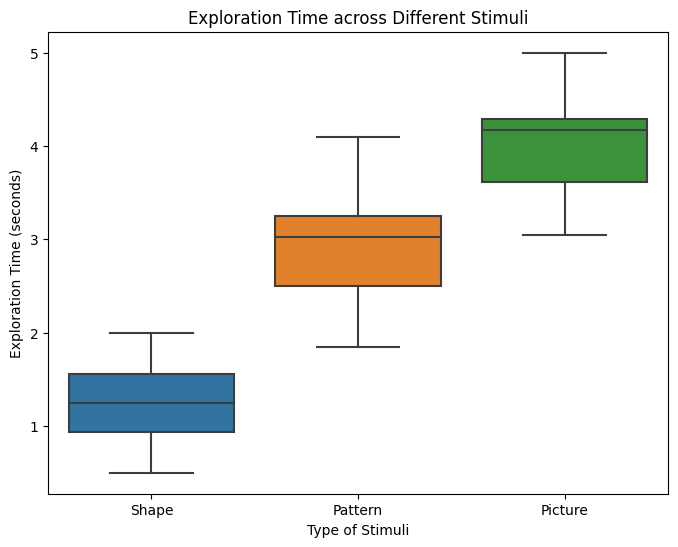

In [12]:
# Plotting the data for visual inspection
plt.figure(figsize=(8, 6))
sns.boxplot(x='Stimuli', y='Time', data=df)
plt.title('Exploration Time across Different Stimuli')
plt.ylabel('Exploration Time (seconds)')
plt.xlabel('Type of Stimuli')
plt.show()

#Conducting ANOVA: One-way ANOVA

In [9]:
anova_result = stats.f_oneway(df[df['Stimuli'] == 'Shape']['Time'],
                              df[df['Stimuli'] == 'Pattern']['Time'],
                              df[df['Stimuli'] == 'Picture']['Time'])

anova_result

F_onewayResult(statistic=62.08885876263247, pvalue=6.531739771892168e-12)

#Post-hoc: Tukey's HSD

In [11]:
tukey_result = pairwise_tukeyhsd(endog=df['Time'], groups=df['Stimuli'], alpha=0.05)

tukey_result.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Pattern,Picture,1.0667,0.0003,0.4668,1.6665,True
Pattern,Shape,-1.6375,0.0,-2.2374,-1.0376,True
Picture,Shape,-2.7042,0.0,-3.304,-2.1043,True


#Conclusion

The one-way ANOVA revealed a significant difference in exploration times across the three types of stimuli. Post-hoc comparisons using Tukey's HSD test indicated that exploration times were significantly different between patterns and pictures and between pictures and shapes, but not between patterns and shapes. The findings suggest that rats respond differently to various visual stimuli, with significant variations in exploration times.